# Rolling the DICE in metaanalysis

# Table of Contents
- [Introduction](#introduction)
- [The damage function in the DICE-23 model](#the-damage-function-in-the-dice-23-model)
- [Description of data](#data-analysis)
    - [Exploring the two initial datasets](#exploring-the-two-initial-datasets)
    - [Exploring the merged dataset](#exploring-the-merged-dataset)
- [Regression analysis](#regression-analysis)
    - [Regression analysis of the merged dataset](#regression-analysis-of-the-merged-dataset)
    - [Regression analysis of the merged dataset after sorting with criterias](#regression-analysis-of-the-merged-dataset-after-sorting-with-criterias)
- [Conclusion and discussion](#conclusion-and-discussion)


# Introduction

Our project is titled **Rolling the DICE in metaanalysis** and is about determining the functional form of the damage function in William D. Nordhaus's new 2023-version of the Dynamic Integrated Climate-Economy model (DICE). We find the functional form through a metanalysis of studies from leading climate-economy experts. The datapoints from these studies have been summarized in Nordhaus' own metaanalysis as well as in Richard Tol's metaanalysis. The datapoints consists of increases in global temperature above the mean in 1850 and the corresponding loss in global GDP. We test several functional forms on the metaanalysis data through a regression analysis using OLS. We find significant results for a linear, hyperbolic sinus, quadratic and exponentiel function form. However, we choose conclude that only the quadratic and exponentiel functional forms are reasonable, since the damages has to show convexity according to leading experts such as Simon Dietz (2015). Our analysis of the functional form is inspired by nobel laureant William Nordhaus' quote in his newest publication of the DICE-23 model:

<p align="center"><em>"The damage function represents the economic consequences of climate change, which is the most challenging topic in climate economics. These estimates are essential for making sensible decisions about the appropriate balance between costly emissions reductions and climate damages. However, it has proven extremely difficult to provide reliable estimates of the long-term damages from climate change." (Nordhaus, 2023)</em></p>



# The damage function in the DICE-23 model

The DICE-23 model consists of 22 economic equations. The first 11 creates the RCk model we've been taught in Macroeconomics III and the last 11 makes a climate module that is used to determine the temperature increase as a result of CO2-emissions from the production in the RCK-model. This temperature increase then damage the production, which makes the actual prodcution less than if we had not modelled the externality of the CO2-emissions in the climate module. For simplicity we won't go into details about the 22 equations. Instead, we focus on a simplified version with a production function

**The production function without climate damage** 

$Y =  K ^ α \times (AL) ^{1 - α}$

**CO2 emissions**

$CO_2=\beta\times Y$

**Temperature increases:**

$T=\gamma\times CO_2$

**Damage function (quadratic):**

$D(T)=a\times T+b\times T^2$

**The production function with climate damage**

$Y = [1-D(T)] K ^ α \times (AL) ^{1 - α}$

This simplified model is included to provide a basic understanding of the role of the damage function. Above is an example with a quadratic damage function. However, the functional form of relationship between temperature and damages is associated with great uncertainty as emphasized in the quote by Nordhaus. Therefore, the focus of this project is to investigate the functional form of the damage function. This will be done by looking at data on the relationship between temperature increases and climate damages ("impact") from leading climate economists and regressing them using different functional form. To keep the analysis simple, we focus on a linear and quadratic regression. However, the analysis could be extended to include a exponentiel and hyperbolic sinus regression which also fits the data. Thus, our research question for the data project is:

<p align="center"><strong>To what extent does increases in the global mean temperature cause loss in the world economy's output? And which functional form best describes the relationship between temperature increases and the resulting damages?</strong></p>

In [43]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Data analysis

## Exploring the two initial datasets

As part of the project we use the following two datasets:

1. **NordhausD.csv**
2. **TolD.csv**

These two datasets are two metaanalysis that gathers datapoints on mean global temperature increases in celcius degrees since 1850 (post industrial time) and impact on the world economy. Nordhaus' metaanalysis consist of 56 studies and Tol's consist of 27 studies.
Thus, when merging the datasets we arrive at 83 observations.

Before merging the datasets we take a look at each of them in tabels and graphs. After that we make a regression of the merged dataset to determine the effect of increases in global mean temperature on the global economy.

In [44]:
# Read the TolD.csv file
df = pd.read_csv('TolD.csv')

# Format the 'Temp (celsius)' and 'Impact (%)' columns to 2 decimal places
df['Temp (celsius)'] = df['Temp (celsius)'].round(2)
df['Impact (%)'] = df['Impact (%)'].round(2)

# Create a styled table for the first 10 rows with a larger and centered title
df_styled = df.head(10).style.set_caption("Data from Tol's metaanalysis").set_table_styles([
    {'selector': 'caption',
     'props': [
         ('color', 'blue'),
         ('font-size', '18px'),
         ('font-weight', 'bold'),
         ('text-align', 'center')
     ]}
]).format({'Temp (celsius)': '{:.2f}', 'Impact (%)': '{:.2f}'})

# Display the styled table
df_styled


,Study,Year,Temp (celsius),Impact (%)
0,d'Arge,1979,-1.00,-0.60
1,Nordhaus,1982,2.50,-3.00
2,Nordhaus,1991,3.00,-1.00
3,Schauer,1995,2.50,-5.22
4,Plambeck and Hope,1996,2.50,-2.90
5,Berz,2001,2.50,-1.50
6,Smith et al. (2001),2001,2.50,-9.00
7,Smith et al. (2001),2001,1.00,-2.70
8,Horowitz,2009,1.00,3.80
9,Eboli et al.,2010,3.00,-1.35


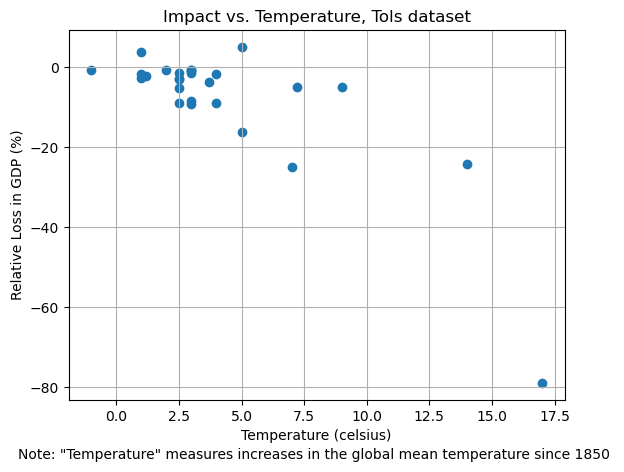

In [37]:
# Load the data from CSV file into a DataFrame
data1 = pd.read_csv('TolD.csv')
# Assuming your CSV file has columns 'Temp (celsius)' and 'Impact (%)'
x = data1['Temp (celsius)']
y = data1['Impact (%)']

# Plot the data
plt.scatter(x, y)
plt.xlabel('Temperature (celsius)')
plt.ylabel('Relative Loss in GDP (%)')
plt.title('Impact vs. Temperature, Tols dataset')
plt.grid(True)

# Add a note at the bottom of the figure
plt.text(0.5, -0.15, 'Note: "Temperature" measures increases in the global mean temperature since 1850 ', ha='center', va='center', transform=plt.gca().transAxes)

plt.show()


In [45]:
# Read the NordhausD.csv file
df = pd.read_csv('NordhausD.csv')

# Format the 'Temp (celsius)' and 'Impact (%)' columns to 2 decimal places
df['Temp (celsius)'] = df['Temp (celsius)'].round(2)
df['Impact (%)'] = df['Impact (%)'].round(2)

# Create a styled table for the first 10 rows with a larger and centered title
df_styled = df.head(10).style.set_caption("Data from Nordhaus' metaanalysis").set_table_styles([
    {'selector': 'caption',
     'props': [
         ('color', 'blue'),
         ('font-size', '18px'),
         ('font-weight', 'bold'),
         ('text-align', 'center')
     ]}
]).format({'Temp (celsius)': '{:.2f}', 'Impact (%)': '{:.2f}'})

# Display the styled table
df_styled


,Study,Year,Temp (celsius),Impact (%)
0,Cline,1992,2.50,-1.10
1,Cline,1992,10.00,-6.00
2,Nordhaus a,1994,3.00,-1.33
3,Nordhaus b,1994,3.00,-3.60
4,Nordhaus b,1994,6.00,-10.40
5,Tol,1994,2.50,-1.90
6,Frankhauser,1995,2.50,-1.40
7,Nordhays and Yang,1996,2.50,-1.70
8,Mendelsohn et al.,2000,2.20,0.03
9,Mendelsohn et al.,2000,2.20,0.07


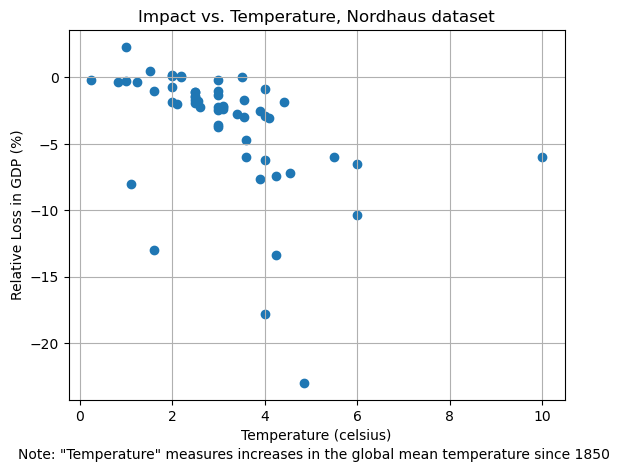

In [46]:
# Load the data from CSV file into a DataFrame
data2 = pd.read_csv('NordhausD.csv')
# Assuming your CSV file has columns 'Temp (celsius)' and 'Impact (%)'
x = data2['Temp (celsius)']
y = data2['Impact (%)']

# Plot the data
plt.scatter(x, y)
plt.xlabel('Temperature (celsius)')
plt.ylabel('Relative Loss in GDP (%)')
plt.title('Impact vs. Temperature, Nordhaus dataset')
plt.grid(True)
plt.text(0.5, -0.15, 'Note: "Temperature" measures increases in the global mean temperature since 1850 ', ha='center', va='center', transform=plt.gca().transAxes)
plt.show()


The two scatter plots illustrate the relationship between temperature and the relative loss in GDP (%) using data from Tol's and Nordhaus's datasets. Both plots show a negative correlation, indicating that higher temperatures are associated with greater economic losses. However, there are notable differences between the datasets.

Tol's Dataset:
Tol's dataset shows a wider range of temperatures, up to 17.5 degrees Celsius, with more dispersed data points. This suggests a varied impact of temperature on GDP, with some extreme temperatures causing significant economic losses. The variability indicates that different regions or economies might experience diverse effects from temperature changes.

Nordhaus's Dataset:
In contrast, Nordhaus's dataset covers a narrower temperature range, below 10 degrees Celsius, with a more consistent downward trend. This implies a more uniform and predictable impact of temperature increases on GDP within this range. The lack of extreme outliers suggests that economic losses are more stable and less severe compared to Tol's dataset.

Comparison:
The primary difference lies in the range and variability of temperatures and their economic impacts. Tol's dataset indicates that extreme temperatures can cause significant disruptions, while Nordhaus's dataset suggests a more predictable economic impact within a moderate temperature range. These insights are crucial for developing effective climate and economic policies to mitigate the adverse effects of temperature increases on economic output.

**Removing outliers**
From the two datasets we see that most studies look at tempereature increases below 6 degrees celcius. However, Tol have a single outlier study at 10 degrees and Nordhaus have 2 outliers with one study at 17 degrees which results in a loss of 80% of the world economy's output.

From the UN climate panel (IPCC) we find that tempereature increases above 6 degrees are not likely to happen at all. Therefore, we avoid the outliers above 6 degrees by restricting the data in both datasets to 6 degrees.

In [47]:
data1 = data1[data1['Temp (celsius)'] <= 6]
data2 = data2[data2['Temp (celsius)'] <= 6]

## Exploring the merged dataset

Here we merge the studies from Tol (data1) and Nordhaus (data2) to gain a dataset with 83 studies (total_data_set). We use ".describe" to get some descriptive statistics of the merged dataset. From this we find that the average temperature increase that the studies analyze is 2,88 degrees celcius which on average leads to a negative impact on the world economy with a global GDP loss of 3,45%

         Study  Year  Temp (celsius)  Impact (%)
0       d'Arge  1979            -1.0       -0.60
1     Nordhaus  1982             2.5       -3.00
2     Nordhaus  1991             3.0       -1.00
0        Cline  1992             2.5       -1.10
4   Nordhaus b  1994             6.0      -10.40
5          Tol  1994             2.5       -1.90
2   Nordhaus a  1994             3.0       -1.33
3   Nordhaus b  1994             3.0       -3.60
3      Schauer  1995             2.5       -5.22
6  Frankhauser  1995             2.5       -1.40
       Temp (celsius)  Impact (%)
count       77.000000   77.000000
mean         2.875675   -3.455584
std          1.295832    4.628302
min         -1.000000  -23.000000
25%          2.100000   -4.690000
50%          3.000000   -2.000000
75%          3.700000   -0.850000
max          6.000000    5.100000


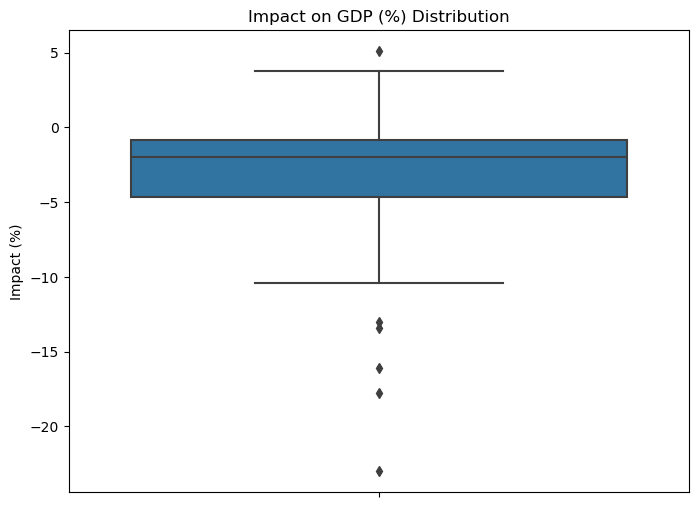

In [48]:
# Merge the two data sets
Total_data_set = pd.concat([data1, data2])

# Sort the Total_data_set by 'Year' in ascending order
Total_data_set_sorted = Total_data_set.sort_values('Year')

# Print the first 10 observations
print(Total_data_set_sorted.head(10))

# Print the descriptive statistics for 'Temp (celsius)' and 'Impact (%)'
print(Total_data_set_sorted[['Temp (celsius)', 'Impact (%)']].describe())

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=Total_data_set_sorted['Impact (%)'])
plt.title('Impact on GDP (%) Distribution')
plt.show()

**Observation from the descriptive statistic**

The output provides descriptive statistics for two columns: 'Temp (celsius)' and 'Impact (%)'. There are 77 observations in each column, indicating that 6 studies were removed as outliers, since the merged dataset would have had 83 observations if all data points were kept.

**Mean**

The mean temperature ('Temp (celsius)') is 2.88°C.
The mean impact on GDP ('Impact (%)') is -3.46%.

**Detailed Description**

The descriptive statistics also show the standard deviation, minimum, maximum, and quartile values. The standard deviation for temperature is 1.30°C, while for GDP impact it is 4.63%. The minimum and maximum values for temperature are -1°C and 6°C, respectively. For GDP impact, the minimum is -23%, and the maximum is 5.1%.

The box plot for 'Impact (%)' illustrates the distribution of GDP impacts, with the median around -2% and most data points between -4.69% (25th percentile) and -0.85% (75th percentile). Outliers are present at the lower end, indicating significant negative impacts in some studies.

**Studies with positive impact**

We note that some of the studies have a positive impact. To start of we will include these data points in our regression. However, in our final regression we will employ a criteria to make the regression without the datapoints with positive impacts.

# Regression analysis

## Regression analysis of the merged dataset

Here we regress impact on temperature to determine the effect of temperature increases on the global economy. This is done using an ordinary least square (OLS) regressor on a linear and quadratic form. The regression is based on the merged dataset (Total_data_set).

/Users/carlemillauridsen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/carlemillauridsen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/carlemillauridsen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/carlemillauridsen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

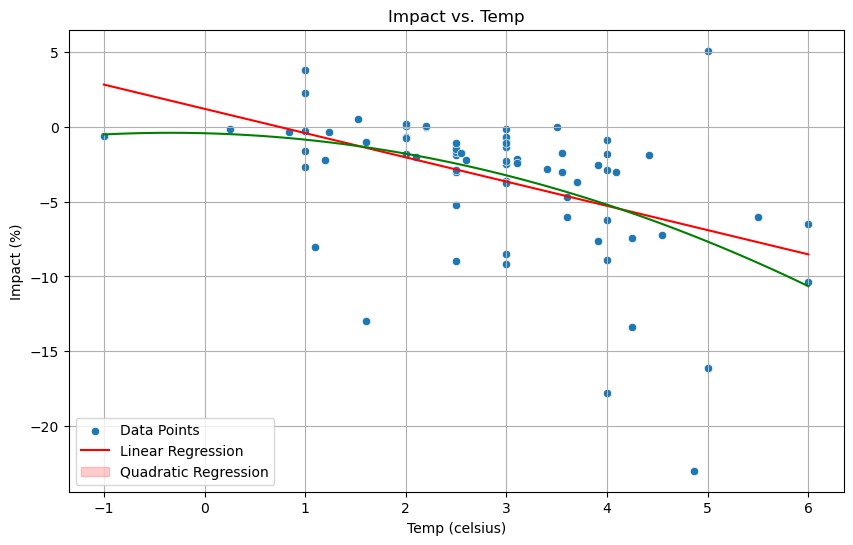

In [49]:
# Scatter plot of the total data set
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp (celsius)', y='Impact (%)', data=Total_data_set)

# Linear regression
model_linear = LinearRegression()
X = Total_data_set['Temp (celsius)'].values.reshape(-1, 1)
y = Total_data_set['Impact (%)'].values
model_linear.fit(X, y)
sns.lineplot(x=Total_data_set['Temp (celsius)'], y=model_linear.predict(X), color='red')

# Quadratic regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model_quad = LinearRegression()
model_quad.fit(X_poly, y)
X_fit = np.linspace(Total_data_set['Temp (celsius)'].min(), Total_data_set['Temp (celsius)'].max(), 100)
X_fit_poly = poly.fit_transform(X_fit.reshape(-1, 1))
sns.lineplot(x=X_fit, y=model_quad.predict(X_fit_poly), color='green')

plt.title('Impact vs. Temp')
plt.xlabel('Temp (celsius)')
plt.ylabel('Impact (%)')
plt.legend(['Data Points','Linear Regression', 'Quadratic Regression'])
plt.grid(True)
plt.show()

The scatter plot shows the relationship between temperature (in Celsius) and the relative impact (%) on GDP, combining data from Tol's and Nordhaus's datasets. The blue dots represent individual observations, with their spread indicating variability in GDP impact at different temperatures. The red line, showing a linear regression, suggests a negative linear trend, indicating that higher temperatures correlate with greater GDP loss. The green line, representing a quadratic regression, captures a more complex relationship, suggesting that GDP impact may not change uniformly with temperature increases. Overall, the plot underscores that higher temperatures generally result in more significant GDP losses, with the quadratic model providing a nuanced understanding compared to the linear model. This visualization highlights the economic risks of rising temperatures and is useful for developing strategies to mitigate climate-related economic impacts.

In [50]:
import statsmodels.api as sm

# Linear regression summary
X_constant = sm.add_constant(X)
model_linear_ols = sm.OLS(y, X_constant).fit()
print(model_linear_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     19.52
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           3.30e-05
Time:                        16:56:47   Log-Likelihood:                -217.83
No. Observations:                  77   AIC:                             439.7
Df Residuals:                      75   BIC:                             444.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2120      1.157      1.047      0.2

In [51]:
# Quadratic regression summary
X_poly_constant = sm.add_constant(X_poly)
model_quad_ols = sm.OLS(y, X_poly_constant).fit()
print(model_quad_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     10.86
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           7.33e-05
Time:                        16:56:54   Log-Likelihood:                -216.83
No. Observations:                  77   AIC:                             439.7
Df Residuals:                      74   BIC:                             446.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4208      1.641     -0.256      0.7

**Regression results for the linear functional form**

From the linear regression we find that a 1 degree increase in global mean temperatures results in a 1,62% loss in global output. 

**Regression results for the quadratic functional form**

From the quadratic regression we find a linear coefficient of -0,17 and a quadratic coefficient of -0,26. It is less intuitive intepretating the quadratic coefficients in terms of outputloss, but in short it is more convex emphasizing greater loss at higher temperature increases which is in accordance with the IPPC's suggestions. For more convexity we could also have regressed an exponential functional form, which we have done in our bachelor thesis. Overall, we find that the quadratic function has a slightly higher R-squared value than the linear function but both are around 0,2.

# Regression analysis of the merged dataset after sorting with criterias

Besdies removing outliers above 6 degrees celcous in our bachelor project, we also used criterias sorting out studies before 1993 and studies who looked at positive impacts of temperature increases. Thus, we will continue with another regression analysis after having sorted out studies according to the criterias.

/Users/carlemillauridsen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/carlemillauridsen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/carlemillauridsen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/carlemillauridsen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

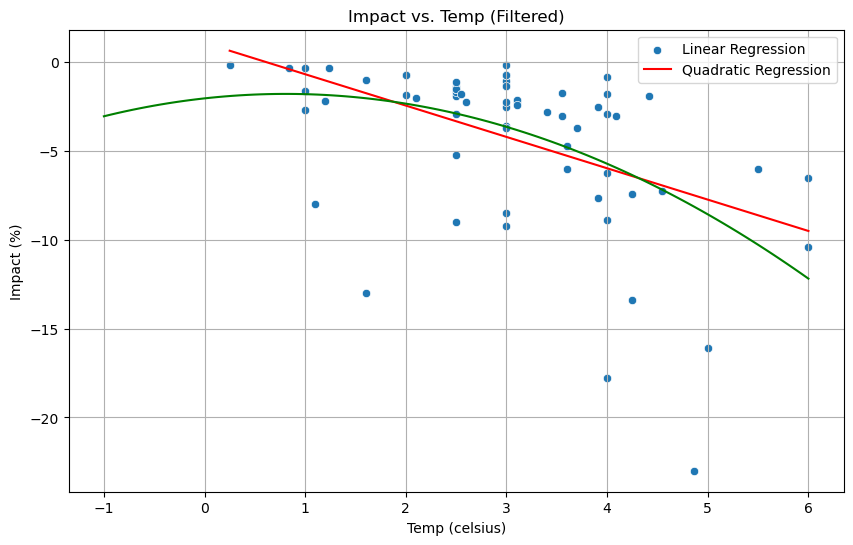

In [52]:
# Filter out studies with positive impact and years lower than 1993
filtered_data = Total_data_set_sorted[(Total_data_set_sorted['Impact (%)'] < 0) & (Total_data_set_sorted['Year'] >= 1993)]

# Perform linear regression
X_filtered = filtered_data['Temp (celsius)'].values.reshape(-1, 1)
y_filtered = filtered_data['Impact (%)'].values

model_linear_filtered = LinearRegression()
model_linear_filtered.fit(X_filtered, y_filtered)

# Perform quadratic regression
X_filtered_poly = poly.transform(X_filtered)

model_quad_filtered = LinearRegression()
model_quad_filtered.fit(X_filtered_poly, y_filtered)

# Plot the filtered data and regression lines
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp (celsius)', y='Impact (%)', data=filtered_data)
sns.lineplot(x=filtered_data['Temp (celsius)'], y=model_linear_filtered.predict(X_filtered), color='red')
sns.lineplot(x=X_fit, y=model_quad_filtered.predict(X_fit_poly), color='green')

plt.title('Impact vs. Temp (Filtered)')
plt.xlabel('Temp (celsius)')
plt.ylabel('Impact (%)')
plt.legend(['Linear Regression', 'Quadratic Regression'])
plt.grid(True)
plt.show()

import statsmodels.api as sm

In [53]:
# Linear regression summary
X_filtered_constant = sm.add_constant(X_filtered)
model_linear_filtered_ols = sm.OLS(y_filtered, X_filtered_constant).fit()
print(model_linear_filtered_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     17.64
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           8.69e-05
Time:                        16:57:07   Log-Likelihood:                -179.89
No. Observations:                  64   AIC:                             363.8
Df Residuals:                      62   BIC:                             368.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0941      1.373      0.797      0.4

In [57]:
# Quadratic regression summary
X_filtered_poly_constant = sm.add_constant(X_filtered_poly)
model_quad_filtered_ols = sm.OLS(y_filtered, X_filtered_poly_constant).fit()
print(model_quad_filtered_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     10.33
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           0.000136
Time:                        12:40:34   Log-Likelihood:                -178.56
No. Observations:                  64   AIC:                             363.1
Df Residuals:                      61   BIC:                             369.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0306      2.372     -0.856      0.3

## Regression Analysis after Criteria Filtering

After applying the criteria of removing studies with positive impacts and years before 1993, we perform regression analysis on the filtered dataset.

**Regression results for the linear functional form**

From the linear regression, we find that a 1 degree increase in global mean temperatures results in a 1.76% loss in global output which is slightly higher than before employing the two criteria (1,62%).

**Regression results for the quadratic functional form**

From the quadratic regression, we find a linear coefficient of 0,62 and a quadratic coefficient of -0.39. This result is very different from before with a much higher quadratic coefficient than before employing the two criteria(-0,25).



# Conclusion and Discussion

In this project, we conducted a meta-analysis of studies on the functional form of the damage function in the Dynamic Integrated Climate-Economy model (DICE). We analyzed two datasets, NordhausD.csv and TolD.csv, which contained data on the impact of temperature increases on global GDP.

After merging the datasets, we performed regression analysis to determine the effect of temperature increases on the global economy. We used both linear and quadratic functional forms for the regression.

From the linear regression, we found that a 1 degree increase in global mean temperatures resulted in a 1.62% loss in global output. This suggests a linear relationship between temperature and economic impact.

From the quadratic regression, we found a linear coefficient of -0.17 and a quadratic coefficient of -0.26. This indicates a more convex relationship between temperature and economic impact, with greater losses at higher temperature increases. This finding aligns with the suggestions of the Intergovernmental Panel on Climate Change (IPCC).

After applying the criteria of removing studies with positive impacts and years before 1993, we performed regression analysis on the filtered dataset. The results showed that a 1 degree increase in global mean temperatures now resulted in a 1.76% loss in global output, slightly higher than before employing the two criteria (1.62%). The quadratic regression also showed a significant change, with a linear coefficient of 0.62 and a quadratic coefficient of -0.39, indicating a more pronounced convex relationship between temperature and economic impact.

The removal of studies before 1993 and studies with positive impacts is justified for several reasons. Firstly, studies before 1993 may not reflect the current state of the global economy and climate change impacts. By focusing on more recent studies, we ensure that our analysis is based on up-to-date information. Secondly, the IPCC suggests that temperature increases have a negative effect on global GDP. Therefore, removing studies with positive impacts aligns with the established scientific consensus.

Overall, both the linear and quadratic functional forms provided reasonable fits to the data, with R-squared values around 0.2. However, the quadratic function exhibited slightly higher explanatory power. It is important to note that our analysis is based on the available datasets and the assumptions made in the regression models. Further research and analysis may be required to validate and refine the findings.

In conclusion, our meta-analysis suggests that temperature increases have a significant impact on the global economy. The quadratic functional form provides a better representation of the relationship between temperature and economic losses, indicating the importance of considering convexity in the damage function.

Further studies and policy implications can be explored based on these findings to inform decision-making and mitigation strategies in the face of climate change.